In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animated-tv-shows-with-imdb-and-google-user-rating/Animated_Tv_Series.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for matplotlib
%matplotlib inline

In [8]:
import pandas as pd

file_path = '/kaggle/input/animated-tv-shows-with-imdb-and-google-user-rating/Animated_Tv_Series.csv'
animated_tv_series = pd.read_csv(file_path, encoding='ISO-8859-1')

In [9]:
animated_tv_series = pd.read_csv(file_path, encoding='ISO-8859-1')

In [10]:
animated_tv_series.head(10)

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,NaN,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%
5,6,The 7D,44.0,2014-2016,Disney XD,Disney Television Animation,NaN,Traditional,5.7,85%
6,7,12 oz. Mouse,31.0,2005-2020,Adult Swim,Williams Street,NaN,Flash,6.5,72%
7,8,The 13 Ghosts of Scooby-Doo,13.0,1985,ABC,Hanna-Barbera,NaN,Traditional,7.3,91%
8,9,101 Dalmatians: The Series,65.0,1997-1998,ABCSyndication,Jumbo PicturesDisney Television Animation,NaN,Traditional,6.1,83%
9,10,Aaahh!!! Real Monsters,52.0,1994-1997,Nickelodeon,Klasky CsupoGames Animation,NaN,Traditional,7.2,86%


In [11]:
animated_tv_series.tail(10)

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
1806,1807,Zafari,52.0,2018-2019,Peacock,Zafari Productions,Canadian co-production,CGI,7.5,76%
1807,1808,Zak Storm,39.0,2016-2018,Discovery Family,Man of Action Entertainment,French-Indonesian-Italian-South Korean co-prod...,CGI,6.8,92%
1808,1809,Zazoo U,13.0,1990,Fox Children's Network,Film Roman,NaN,Traditional,7.7,84%
1809,1810,The Zeta Project,26.0,2001-2002,Kids' WB,Warner Bros. Animation,NaN,Traditional,7.0,93%
1810,1811,Zevo-3,26.0,2010-2011,Nicktoons,MoonScoop Entertainment,NaN,Traditional,5.8,93%
1811,1812,The ZhuZhus,26.0,2016-2017,Disney Channel,Cepia LLC,Canadian co-production,Flash,5.5,72%
1812,1813,Zoboomafoo,65.0,1999-2001,PBS Kids,Maryland Public Television,Canadian co-production,Stop-motion/Live-action,7.6,95%
1813,1814,Zombie College,12.0,2000-2001,NaN,icebox.com,NaN,Flash,6.8,62%
1814,1815,Zootopia+,6.0,2022,Disney+,Walt Disney Animation Studios,NaN,CGI,6.8,74%
1815,1816,The Zula Patrol,52.0,2005-2008,PBS Kids,The Hatchery,NaN,CGI,6.9,93%


In [12]:
animated_tv_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1816 non-null   int64  
 1   Title             1816 non-null   object 
 2   Episodes          1798 non-null   float64
 3   Year              1816 non-null   object 
 4   Original channel  1809 non-null   object 
 5   American company  1771 non-null   object 
 6   Note              488 non-null    object 
 7   Technique         1816 non-null   object 
 8   IMDb              1812 non-null   float64
 9   Google users      1812 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 142.0+ KB


In [13]:
missing_values = animated_tv_series.iloc[:, :10].isnull().sum()

missing_values

Id                     0
Title                  0
Episodes              18
Year                   0
Original channel       7
American company      45
Note                1328
Technique              0
IMDb                   4
Google users           4
dtype: int64

In [14]:
# Drop rows with any NaN values
animated_tv_series_dropped_rows = animated_tv_series.dropna(axis=0) 

print(animated_tv_series_dropped_rows)

        Id                       Title  Episodes       Year  Original channel  \
4        5                  3rd & Bird      51.0  2008-2010  Playhouse Disney   
97      98  Ace Ventura: Pet Detective      41.0  1995-2000    CBSNickelodeon   
98      99           Action Man (2000)      26.0  2000-2001          Fox Kids   
99     100                 Action Pack      17.0       2022           Netflix   
100    101             Adventure Beast      12.0       2021           Netflix   
...    ...                         ...       ...        ...               ...   
1805  1806            Young Robin Hood      26.0  1991-1992       Syndication   
1806  1807                      Zafari      52.0  2018-2019           Peacock   
1807  1808                   Zak Storm      39.0  2016-2018  Discovery Family   
1811  1812                 The ZhuZhus      26.0  2016-2017    Disney Channel   
1812  1813                  Zoboomafoo      65.0  1999-2001          PBS Kids   

                 American c

In [15]:
# Remove duplicate rows based on all columns
animated_unique = animated_tv_series_dropped_rows.drop_duplicates()

print(animated_unique)

        Id                       Title  Episodes       Year  Original channel  \
4        5                  3rd & Bird      51.0  2008-2010  Playhouse Disney   
97      98  Ace Ventura: Pet Detective      41.0  1995-2000    CBSNickelodeon   
98      99           Action Man (2000)      26.0  2000-2001          Fox Kids   
99     100                 Action Pack      17.0       2022           Netflix   
100    101             Adventure Beast      12.0       2021           Netflix   
...    ...                         ...       ...        ...               ...   
1805  1806            Young Robin Hood      26.0  1991-1992       Syndication   
1806  1807                      Zafari      52.0  2018-2019           Peacock   
1807  1808                   Zak Storm      39.0  2016-2018  Discovery Family   
1811  1812                 The ZhuZhus      26.0  2016-2017    Disney Channel   
1812  1813                  Zoboomafoo      65.0  1999-2001          PBS Kids   

                 American c

In [16]:
animated_unique.head(10)

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%
97,98,Ace Ventura: Pet Detective,41.0,1995-2000,CBSNickelodeon,Nelvana,Canadian co-production,Traditional,6.9,87%
98,99,Action Man (2000),26.0,2000-2001,Fox Kids,Saban Entertainment,Canadian co-production,CGI,6.4,93%
99,100,Action Pack,17.0,2022,Netflix,OddBot Inc.,British-Canadian co-production,CGI,6.2,53%
100,101,Adventure Beast,12.0,2021,Netflix,Mission Control Media,Australian co-production,Flash,5.4,62%
101,102,The Adventures of Chuck and Friends,39.0,2010-2012,The Hub,Hasbro Studios,Canadian co-production,CGI,5.4,71%
102,103,The Adventures of Don Coyote and Sancho Panda,26.0,1990-1991,Syndication,Hanna-Barbera,Italian co-production,Traditional,7.2,72%
103,104,The Adventures of Napkin Man!,60.0,2013-2017,CBC Kids,Little Airplane Productions,Canadian co-production,Flash/Live-Action,7.9,77%
104,105,The Adventures of Sam & Max: Freelance Police,13.0,1997-1998,Fox Kids,Nelvana,Canadian co-production,Traditional,7.7,90%
105,106,The Adventures of Super Mario Bros. 3,13.0,1990,NBC,DIC Entertainment,Canadian-Italian co-production,Traditional,7.0,89%


In [17]:
animated_unique.describe()

,Id,Episodes,IMDb
count,474.000000,474.000000,474.000000
mean,935.105485,43.548523,6.585865
std,530.756867,41.277419,1.258993
min,5.000000,3.000000,2.000000
25%,466.250000,20.000000,6.000000
50%,905.000000,27.000000,6.800000
75%,1503.750000,52.000000,7.400000
max,1813.000000,455.000000,9.000000


Data Visualization - Distribution of Episodes Among Animated TV Series

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


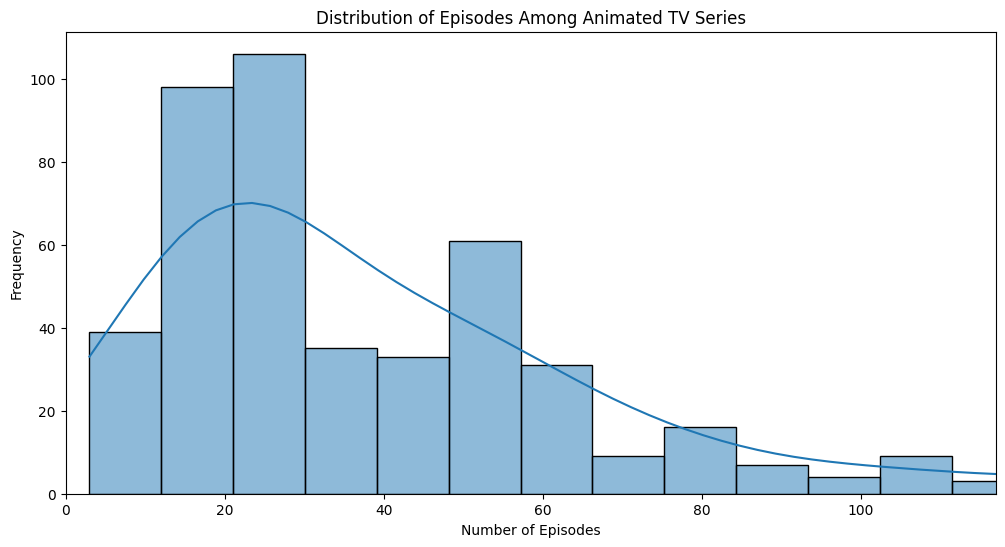

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is clean for visualization
animated_tv_series_df_clean = animated_unique.dropna(subset=['Episodes'])

# Histogram of episode distribution
plt.figure(figsize=(12, 6))
sns.histplot(animated_tv_series_df_clean['Episodes'], bins=50, kde=True)
plt.title('Distribution of Episodes Among Animated TV Series')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.xlim(0, animated_tv_series_df_clean['Episodes'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

Data Visualization - episode counts

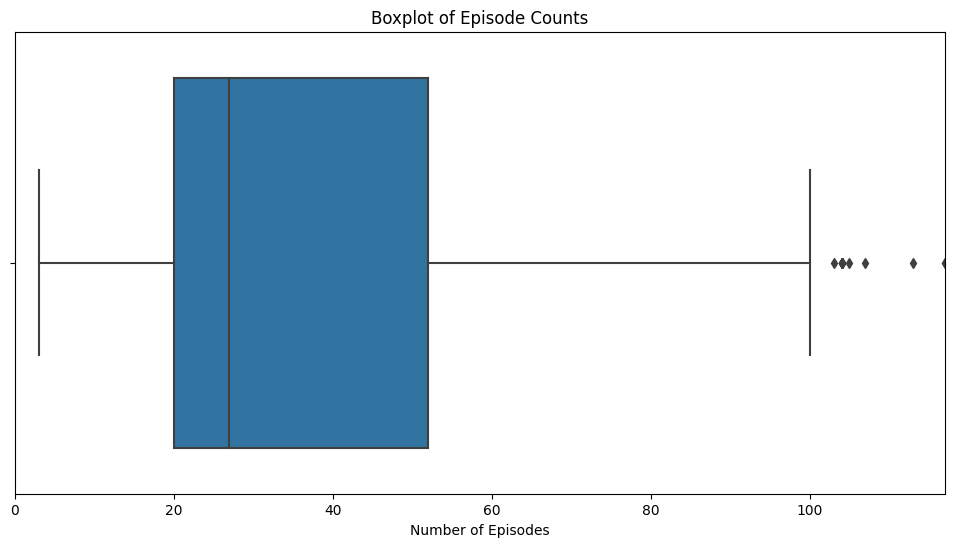

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of episode counts
plt.figure(figsize=(12, 6))
sns.boxplot(x=animated_tv_series_df_clean['Episodes'])
plt.title('Boxplot of Episode Counts')
plt.xlabel('Number of Episodes')
plt.xlim(0, animated_tv_series_df_clean['Episodes'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

Visualize For First 10 Rows

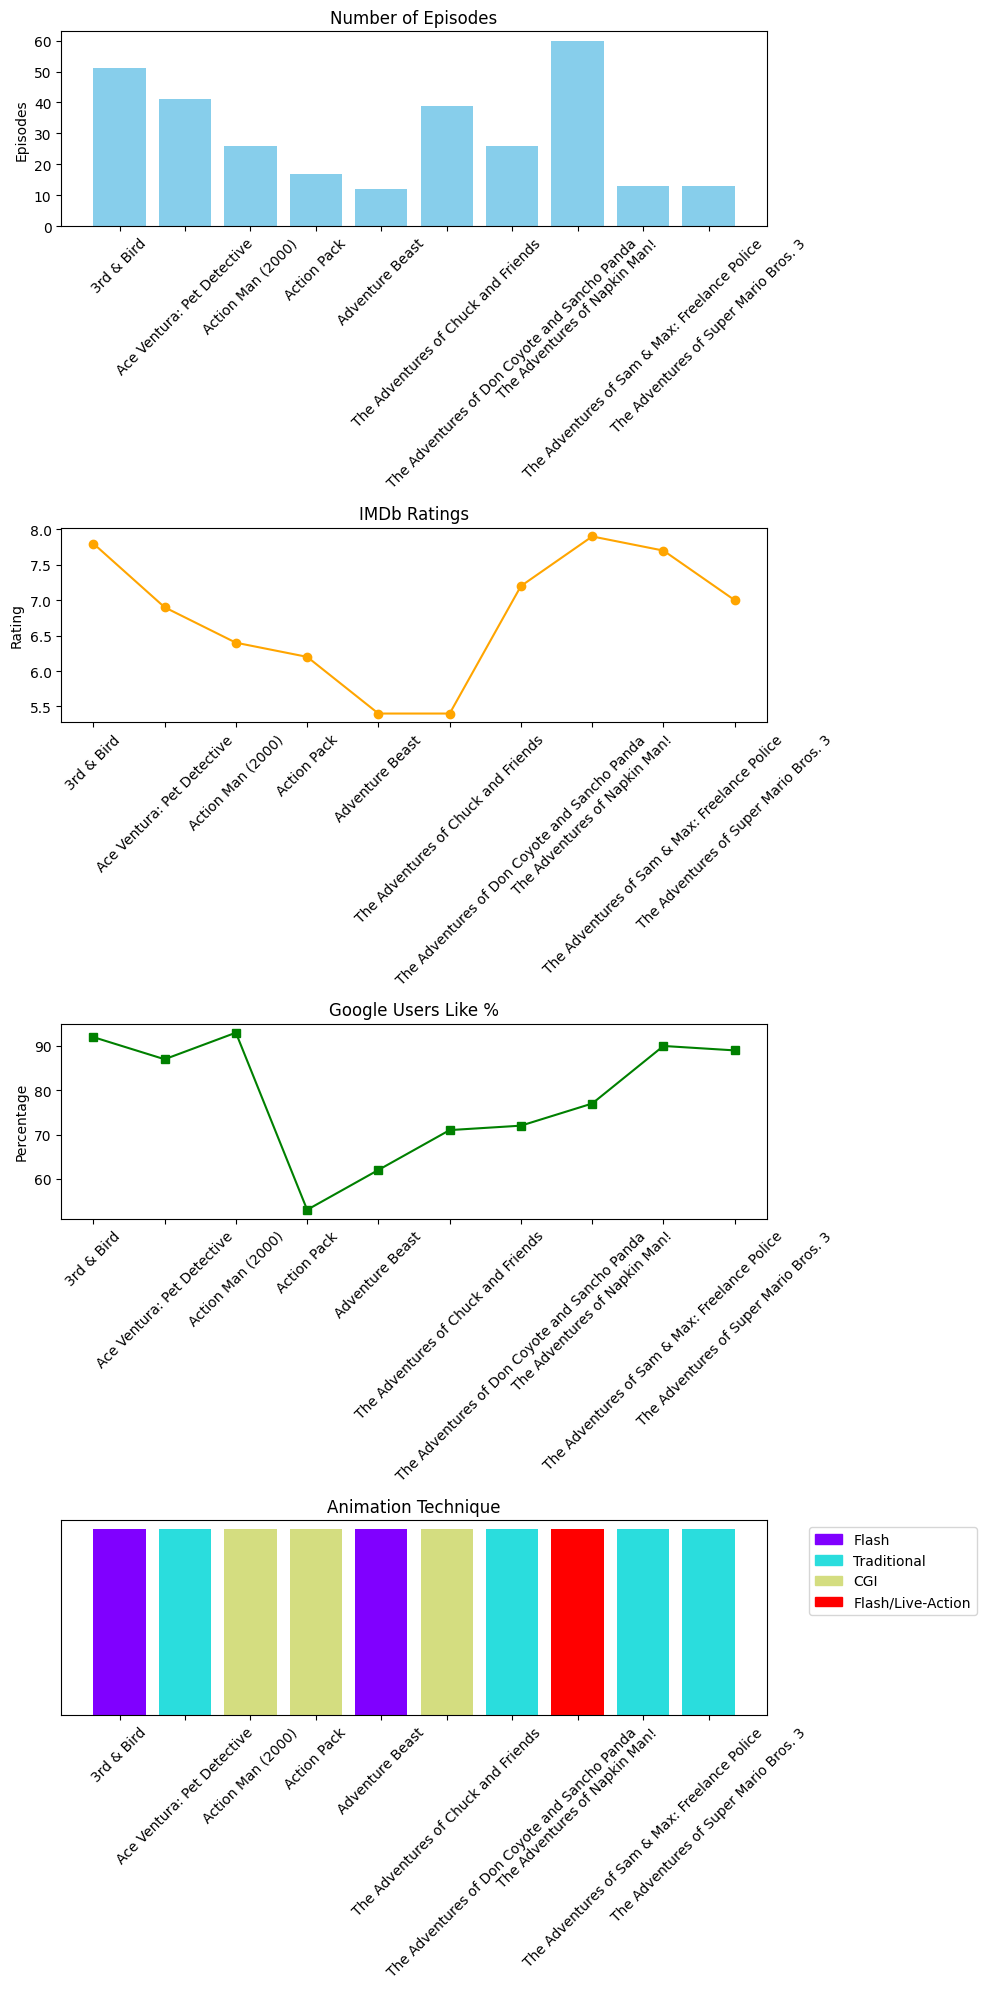

In [56]:
# First, let's prepare our data subset - the first 10 rows
data_subset = animated_unique.head(10)

# Setting up the plotting area
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Plotting 'Episodes'
axs[0].bar(data_subset['Title'], data_subset['Episodes'], color='skyblue')
axs[0].set_title('Number of Episodes')
axs[0].set_ylabel('Episodes')
axs[0].tick_params('x', labelrotation=60)

# Plotting 'IMDb' ratings
axs[1].plot(data_subset['Title'], data_subset['IMDb'], marker='o', linestyle='-', color='orange')
axs[1].set_title('IMDb Ratings')
axs[1].set_ylabel('Rating')
axs[1].tick_params('x', labelrotation=60)

# Plotting 'Google users' like percentage
axs[2].plot(data_subset['Title'], data_subset['Google users']*100, marker='s', linestyle='-', color='green')
axs[2].set_title('Google Users Like %')
axs[2].set_ylabel('Percentage')
axs[2].tick_params('x', labelrotation=60)

# Plotting 'Technique' - Since it's categorical, let's use a unique color for each technique
techniques = data_subset['Technique'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(techniques)))
tech_color = {tech: col for tech, col in zip(techniques, colors)}
axs[3].bar(data_subset['Title'], data_subset['Technique'].map(lambda x: 1), color=[tech_color[tech] for tech in data_subset['Technique']])
axs[3].set_title('Animation Technique')
axs[3].set_yticks([])  # Hide y-axis since it's not meaningful here
axs[3].tick_params('x', labelrotation=60)

# Adding a legend for the 'Technique' plot to explain colors
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=col, label=tech) for tech, col in tech_color.items()]
axs[3].legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
# Convert 'Google users' percentage to numeric, removing the '%' sign and converting to a float
animated_unique['Google users'] = animated_unique['Google users'].str.rstrip('%').astype('float') / 100.0

# Display data types for each column to identify non-numeric columns and the need for conversion
animated_unique.dtypes

Id                    int64
Title                object
Episodes            float64
Year                 object
Original channel     object
American company     object
Note                 object
Technique            object
IMDb                float64
Google users        float64
dtype: object

In [33]:
# Explore the frequencies of categories in the 'Technique' column
technique_value_counts = animated_unique['Technique'].value_counts()

In [35]:
technique_value_counts

Technique
Traditional                                                                                                                                                                                           212
Flash                                                                                                                                                                                                 120
CGI                                                                                                                                                                                                   113
Stop-Motion                                                                                                                                                                                             7
Stop-motion                                                                                                                                                                           

In [36]:
print(animated_unique.columns)

Index(['Id', 'Title', 'Episodes', 'Year', 'Original channel',
       'American company', 'Note', 'Technique', 'IMDb', 'Google users'],
      dtype='object')


Predicting the IMDb rating based on features like the number of episodes, technique, and Google user ratings.

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-03-16 00:10:21.565741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 00:10:21.565918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 00:10:21.745320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [51]:
# Convert categorical data to numeric
animated_unique['Technique_encoded'] = pd.Categorical(animated_unique['Technique']).codes

# Normalize numeric data
features = ['Episodes', 'Google users', 'Technique_encoded']
X = animated_unique[features]
y = animated_unique['IMDb']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer: Predicting a single value
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 43.1415 - val_loss: 11.6464
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.7695 - val_loss: 8.2399
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2440 - val_loss: 5.0986
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.0403 - val_loss: 5.4966
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.3817 - val_loss: 4.7770
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7677 - val_loss: 5.1969
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3235 - val_loss: 4.1903
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4153 - val_loss: 4.4874
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.0989 - val_loss: 3.9157
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1506 - val_loss: 3.8895


In [54]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3294 
Test Loss: 7.75808572769165


Data Visualization with Histograms - The distribution of actual vs. predicted IMDb ratings.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


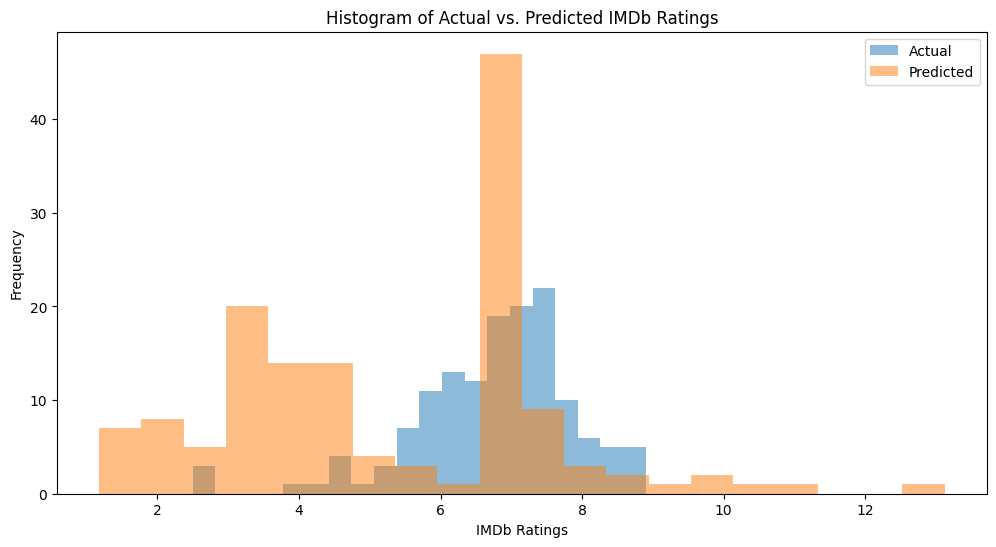

In [55]:
predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
plt.hist(predictions, bins=20, alpha=0.5, label='Predicted')
plt.title('Histogram of Actual vs. Predicted IMDb Ratings')
plt.xlabel('IMDb Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()